In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import string

# Question 01 (2-D Transforms)

This function is for plotting the original object and transformed one

In [7]:
def plot_points(points1, points2):
    # Normalization
    points1 = points1/points1[-1, :] #making homogeneous coordinates.
    points1 = np.insert(points1,4,points1[:,0],axis=1)
    x = points1[0, :]
    y = points1[1, :]
    
    points2 = points2/points2[-1, :] #making homogeneous coordinates.
    points2 = np.insert(points2,4,points2[:,0],axis=1)
    xt = points2[0,:]
    yt = points2[1,:]
    
    # Plotting 
    fig,ax = plt.subplots(1,1,sharex=True, sharey=True)
    ax.plot(x, y,color = '#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_aspect('equal')

    ax.plot(xt, yt, color='#ff00cc', alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
    ax = plt.gca()
    ax.set_aspect('equal')

This part includes seperate functions for the basic transformations

In [14]:
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)

# matrix with column vectors of points
P = np.array([a, b, c, d]).T
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0,:]
y = P[1,:]
# print(x)
# print(y)


# Define Transformations


def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])



def get_affine(a,b,c,d,e,f):
    return np.array([
        [a, b, c],
        [d, e, f],
        [0, 0, 1]
    ])


def get_homography(l,m,n,o,p,q,r,s):
    return np.array([
        [l, m, n],
        [o, p, q],
        [r, s, 1]
    ])

R1 = get_rotation(-60)
T1 = get_translation(2, -2)
S1 = get_scale(2)
A1 = get_affine(2,0.5,2,2,1,1)
H1 = get_homography(2,0.5,2,2,1,0.3,0.5,1)

# Apply transformation x' = Ax  #I've used '@' instead of matmul here.
points_rot = R1 @ P
points_trans = T1 @ P
points_scale = S1 @ P
points_composite1 = R1 @ T1 @ P
points_composite2 = T1 @ R1 @ P
points_similarity = S1 @ R1 @ T1 @ P
points_affine = A1 @ P
points_homography = (H1 @ P)


Plotting the original and transformed objects.

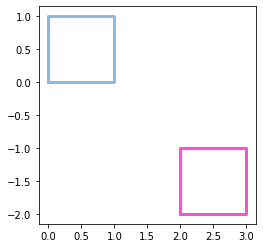

In [15]:
# Translation

plot_points(P,points_trans)

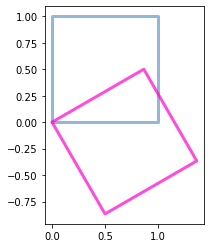

In [16]:
# Rotation (Angle = 60)

plot_points(P,points_rot)

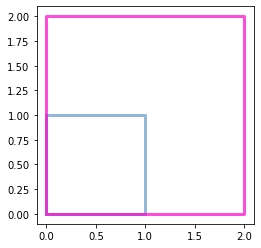

In [17]:
# Scaling (factor = 2)

plot_points(P,points_scale)

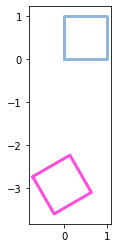

In [18]:
# Composite 01 (Eucledian)

plot_points(P,points_composite1)

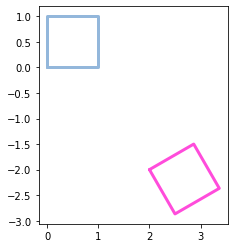

In [19]:
# Composite 02 (Eucledian)

plot_points(P,points_composite2)

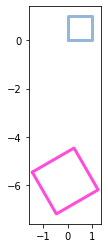

In [20]:
#Similarity

plot_points(P,points_similarity)

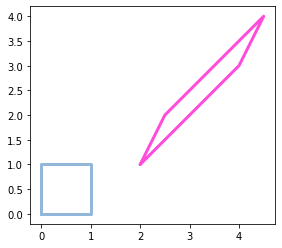

In [21]:
#Affine

plot_points(P,points_affine)

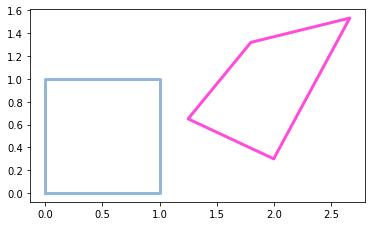

In [22]:
#Homography

plot_points(P,points_homography)

# Question 2 - Warping Using a Given Homography

In [ ]:
# Reading Images
im1 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

# Load Homography Matrix
with open("/Users/sahangurusinghe/Desktop/images/graf/H1to4p") as f:
    H = np.array([[float(x) for x in line.split()] for line in f])
    
print('HOMOGRAPHY\n', H)
H = np.array(H)

# Warping Images
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

# Displaying Images
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Stitched Images", cv.WINDOW_AUTOSIZE)
cv.imshow("Stitched Images", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

HOMOGRAPHY
 [[ 6.6378505e-01  6.8003334e-01 -3.1230335e+01]
 [-1.4495500e-01  9.7128304e-01  1.4877420e+02]
 [ 4.2518504e-04 -1.3930359e-05  1.0000000e+00]]


# Question 03 - Computing the Homogrpahy Using Mouse-Clicked Points and Warping (Using OpenCV)

In [2]:
# Number of Points
global N, n
N = 5
n = 0

# Mouse Callback Function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
        
# Store Mouse Clicked Points
def store_mouse_click(image, title):
    imcopy = image.copy()
    points = np.empty((N,2))
    param = [points, imcopy]
    
    cv.namedWindow(title, cv.WINDOW_AUTOSIZE)
    cv.setMouseCallback(title, draw_circle, param)
    
    global n 
    n = 0
    while(1):
        cv.imshow(title, imcopy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break
            
    return points

In [3]:
# Reading Images
im1 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)

p1 = store_mouse_click(im1, 'Image 1')
p2 = store_mouse_click(im4, 'Image 2')

cv.destroyAllWindows()

print('POINTS\n', p1, '\n\n', p2)



POINTS
 [[335. 190.]
 [407. 206.]
 [528. 224.]
 [380. 471.]
 [627. 415.]] 

 [[283. 254.]
 [325. 249.]
 [386. 238.]
 [467. 479.]
 [529. 364.]]


# Calling Built-in OpenCV Function to Find Homography

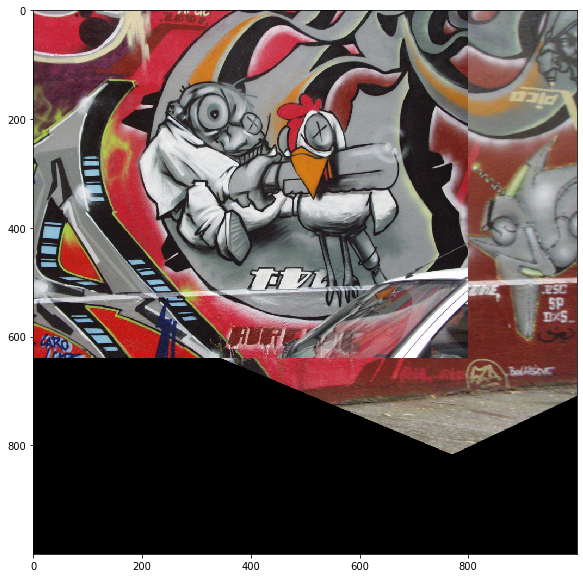

In [4]:

H = cv.findHomography(p1, p2)
H = np.array(H[0])

im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
# print(im4_warped.shape)
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

im4_warped = cv.cvtColor(im4_warped, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(im4_warped)

# Question 04 - Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [5]:
def compressMatrixA(p1,p2):
    A = np.zeros((2*N,8))
    for i in range(0,2*N,2):
            xi = p1[i//2,0]
            yi = p1[i//2,1]
            xpi = p2[i//2,0]
            ypi = p2[i//2,1]
            
            A[i,0] = xi
            A[i,1] = yi
            A[i,2] = 1
            A[i,6] = -xi*xpi
            A[i,7] = -yi*xpi
            
            A[i+1,3] = xi
            A[i+1,4] = yi
            A[i+1,5] = 1
            A[i+1,6] = -xi*ypi
            A[i+1,7] = -yi*ypi  
    return A

def compressMatrixXprime(p):
    Xprime = np.empty((2*N,1))
    for i in range(0,2*N,2):
        Xprime[i,0] = p[i//2,0]
        Xprime[i+1,0] = p[i//2,1]
    return Xprime
         
def calHomography(A,Xprime):
    H = np.empty((3,3))
    a = np.linalg.inv((A.T)@A) @ A.T @ Xprime
    for i in range(8):
        H[i//3,i%3] = a[i]
        H[2,2] = 1
    return H

# Calculating the homography by least squares method

In [6]:
A = compressMatrixA(p1,p2)
Xprime = compressMatrixXprime(p2)
# print(A)
# print(Xprime)
Hcal = calHomography(A,Xprime)

print('HOMOGRAPHY_OPENCV\n', H,'\n\n')
print('HOMOGRAPHY_CALCULATED\n', Hcal)


HOMOGRAPHY_OPENCV
 [[ 6.18714963e-01  6.03137606e-01 -9.25404131e+00]
 [-1.63332932e-01  8.91846631e-01  1.65050097e+02]
 [ 3.69743305e-04 -1.03144895e-04  1.00000000e+00]] 


HOMOGRAPHY_CALCULATED
 [[ 6.17767245e-01  5.99942067e-01 -8.63446899e+00]
 [-1.62669911e-01  8.88402938e-01  1.65156975e+02]
 [ 3.69155387e-04 -1.08278463e-04  1.00000000e+00]]


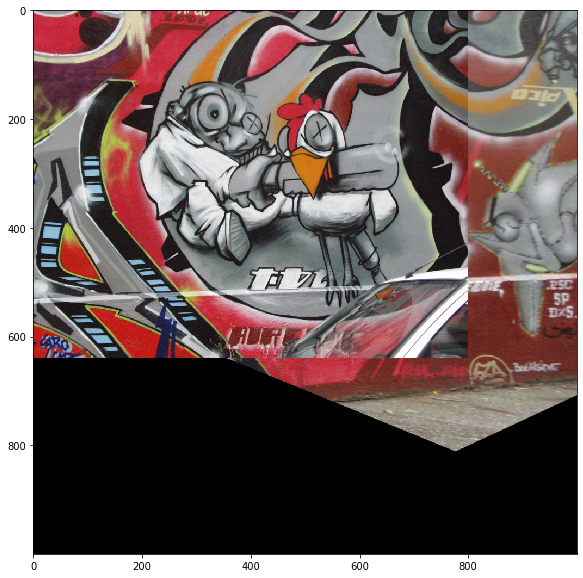

In [6]:

im4_warped_new = cv.warpPerspective(im4, np.linalg.inv(Hcal), (1000,1000))
im4_warped_new[0:im1.shape[0], 0:im1.shape[1]] = im1

im4_warped_new = cv.cvtColor(im4_warped_new, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(im4_warped_new)

# Question 05 -  Stitching more than two images using mouse clicked points.


POINTS
 [[336. 191.]
 [405. 207.]
 [525. 224.]
 [380. 469.]
 [629. 413.]] 

 [[283. 252.]
 [325. 249.]
 [386. 237.]
 [467. 476.]
 [530. 363.]] 

 [[383. 235.]
 [409. 257.]
 [452. 282.]
 [419. 520.]
 [496. 460.]]


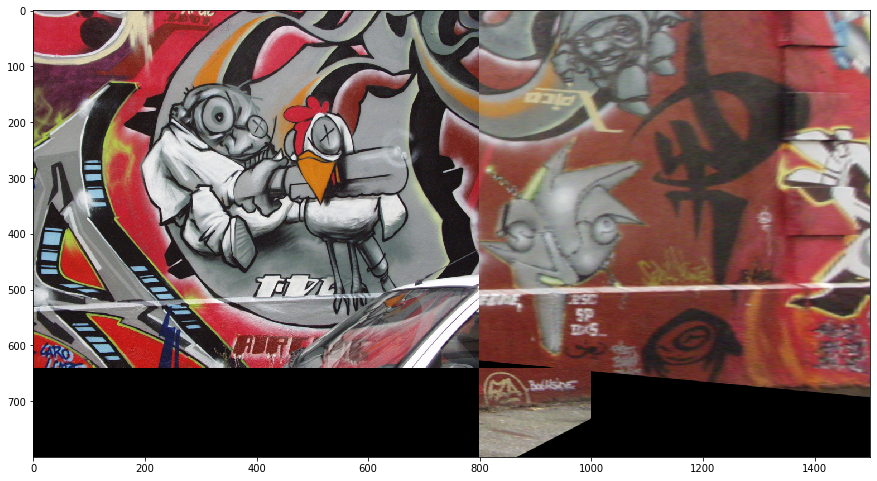

In [3]:
# Reading Images
im1 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)

p1 = store_mouse_click(im1, 'Image 1')
p2 = store_mouse_click(im4, 'Image 2')
p3 = store_mouse_click(im5, 'Image 2')

cv.destroyAllWindows()

print('POINTS\n', p1, '\n\n', p2, '\n\n', p3)


# Calling Built-in OpenCV Function to Find Homography
H1 = cv.findHomography(p1, p2)
H1 = np.array(H1[0])

H2 = cv.findHomography(p1, p3)
H2 = np.array(H2[0])

im4_warped = cv.warpPerspective(im4, np.linalg.inv(H1), (1000,800))
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H2), (1500,800))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
im5_warped[im1.shape[0]:im4_warped.shape[0], im1.shape[1]:im4_warped.shape[1]] = im4_warped[im1.shape[0]:,im1.shape[1]:]


im_rgb = cv.cvtColor(im5_warped, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(im_rgb)

# cv.namedWindow("Stitched Images", cv.WINDOW_AUTOSIZE)
# cv.imshow("Stitched Images", im5_warped)
# cv.waitKey(0)



In [2]:
# im1 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
# print(im1.shape)

(640, 800, 3)


# Question 06 - Stitching images using SIFT or SURF features. Compute the homography though RANSAC. 



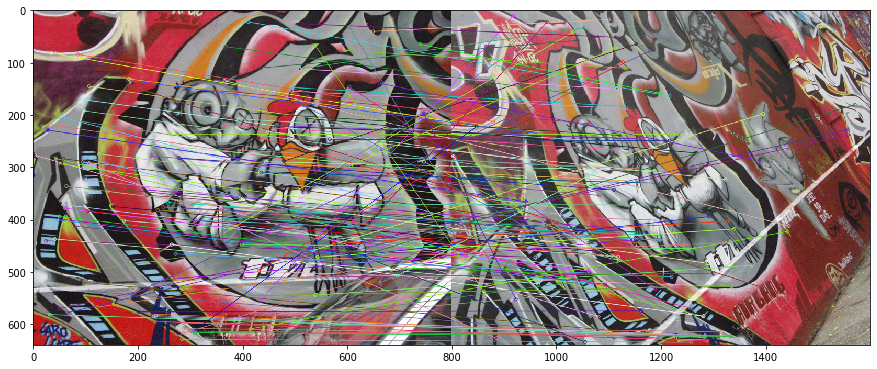

(<matplotlib.image.AxesImage at 0x1034d2190>, None)

In [4]:
im1 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('/Users/sahangurusinghe/Desktop/images/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

im1Gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2Gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im1Gray,None)
kp2, des2 = sift.detectAndCompute(im2Gray,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good1 = []
good2 = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good1.append([m])
        good2.append(m)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(im1,kp1,im2,kp2,good1,None,flags=2)
plt.figure(figsize=(15,10))
plt.imshow(img3),plt.show()

In [5]:
# Extract location of good matches
points1 = np.float32([ kp1[m.queryIdx].pt for m in good2 ]).reshape(-1,1,2)
points2 = np.float32([ kp2[m.trainIdx].pt for m in good2 ]).reshape(-1,1,2)
h, mask = cv.findHomography(points1, points2, cv.RANSAC)
print(h)



[[ 6.60807840e-01  6.77205616e-01 -3.06056920e+01]
 [-1.48667370e-01  9.66645384e-01  1.50583094e+02]
 [ 4.14790537e-04 -1.33447047e-05  1.00000000e+00]]


In [6]:
im2_warped = cv.warpPerspective(im2, np.linalg.inv(h), (1000,1000))
im2_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

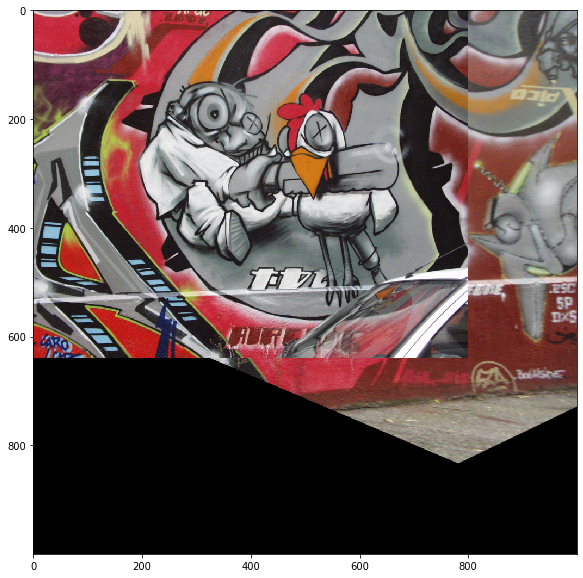

(<matplotlib.image.AxesImage at 0x11a756090>, None)

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(im2_warped),plt.show()